In [33]:
import pandas as pd
import numpy as np

cutoff = 1e-10

proteomes = ["human", "mouse", "zebrafish", "drosophila", "c.elegans", "yeast", "ciliate", "methanocaldococcus", "thermococcus", "e.coli", "tuberculosis"]
proteins = ["HDAC9", "SMARCA4", "HDAC1", "BRD4", "ARID2", "PBRM1", "EP300", "KMT2C", "KAT5", "CREBBP"]

heatmap_data = dict()
dist_data = dict()

for proteome in proteomes:
    heatmap_data[proteome] = dict()
    dist_data[proteome] = dict()
    for protein in proteins:
        data = pd.read_csv(f"results/{protein}-{proteome}.blast",
                    sep="\t",
                    names=["qseqid", "sseqid", "pident", "length", "mismatch", "gapopen", "qstart", "qend", "sstart",
                            "send", "evalue", "bitscore"],
                        skiprows=5
                    )

        heatmap_data[proteome][protein] = max(0, -np.log10(max(data.at[0, "evalue"], 1e-300))) if data.shape[0] else 0
        dist_data[proteome][protein] = data[data["evalue"] < 1e-5].shape[0]

heatmap_df = pd.DataFrame.from_records(heatmap_data)
dist_df = pd.DataFrame.from_records(dist_data)


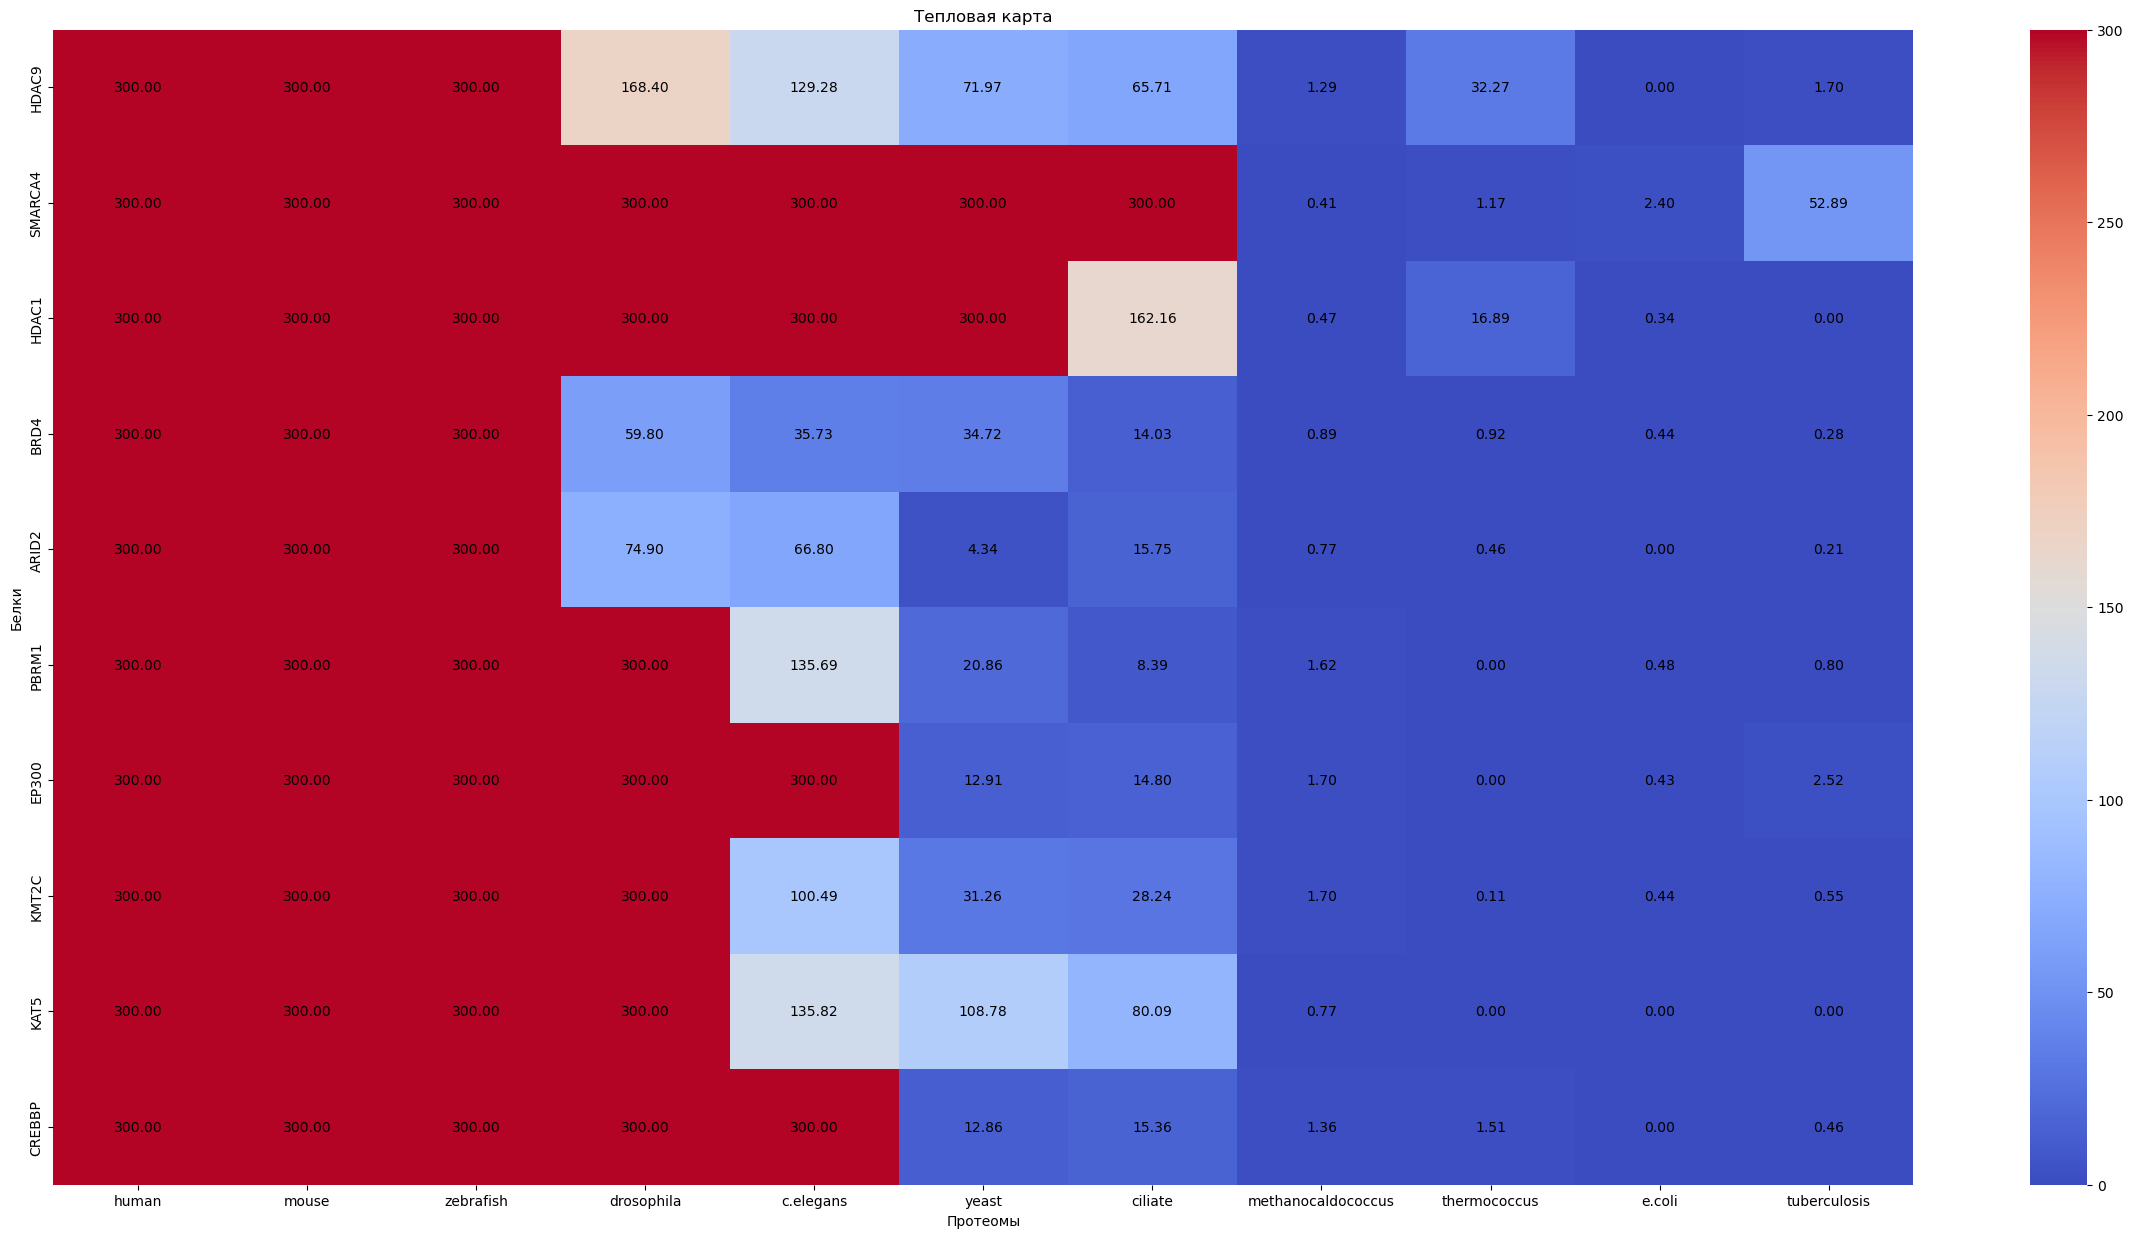

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_df = heatmap_df.reindex(["human", "mouse", "zebrafish", "drosophila", "c.elegans", "yeast", "ciliate", "methanocaldococcus", "thermococcus", "e.coli", "tuberculosis"], axis=1)

plt.figure(figsize=(30, 15))
sns.heatmap(heatmap_df, cmap='coolwarm')

for i in range(heatmap_df.shape[0]):
    for j in range(heatmap_df.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{heatmap_df.iloc[i, j]:.2f}', ha='center', va='center')

plt.xlabel('Протеомы')
plt.ylabel('Белки')

plt.title('Тепловая карта')

plt.savefig("heatmap.png", transparent=True)

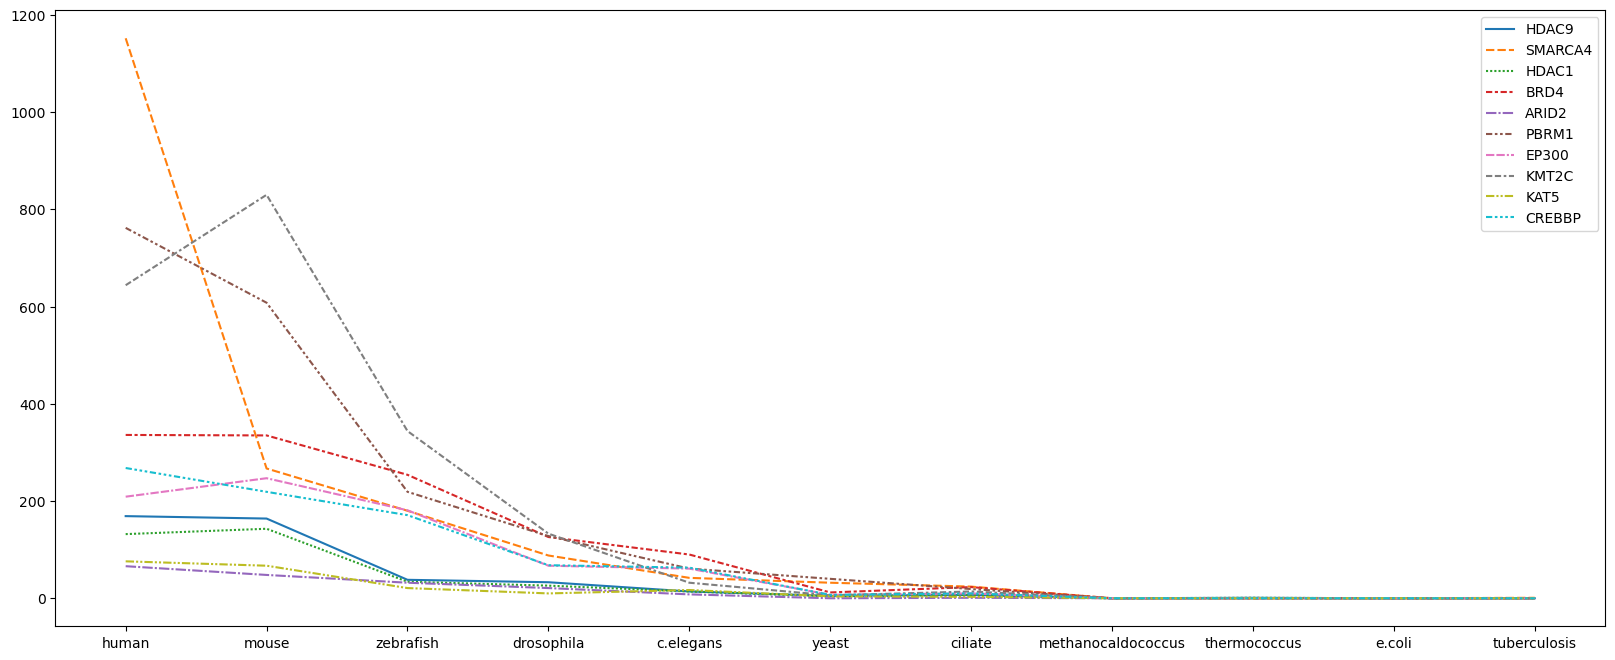

In [35]:
dist_df = dist_df.reindex(["human", "mouse", "zebrafish", "drosophila", "c.elegans", "yeast", "ciliate", "methanocaldococcus", "thermococcus", "e.coli", "tuberculosis"], axis=1)
plt.figure(figsize=(20, 8))
sns.lineplot(dist_df.transpose())
plt.savefig("plots.png", transparent=True)